In [1]:
# Establish and clean data:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("Tweets.csv")
df.drop(df.columns[[0, 3, 4, 6, 8, 11, 13, 14]], axis=1, inplace=True)
df.head()

,airline_sentiment,airline_sentiment_confidence,airline,name,retweet_count,text,tweet_created
0,neutral,1.0000,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800
1,positive,0.3486,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800
2,neutral,0.6837,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800
3,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800
4,negative,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800


In [2]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = [str(i) for i in df["text"].values]
# data = df["text"].dropna()
sentiment = sentiment_pipeline(data)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


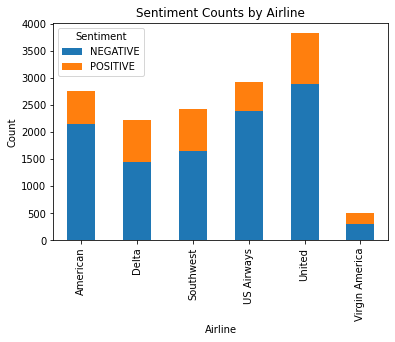

In [3]:
outputs = pd.DataFrame(sentiment)
df['label'] = outputs['label']

#plot sentiment grouped by airline
grouped = df.groupby(['airline', 'label']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Sentiment Counts by Airline')
plt.legend(title='Sentiment')
plt.savefig("sentiments_by_airline.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            orientation ='landscape')
plt.show()